In [1]:
# boilerplate
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from pretty import mat_print, mathjax,math
from IPython.display import display, HTML

import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

display(HTML(mathjax))


display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
    body {
    font-family: "Comic Sans MS", cursive, sans-serif;
}


</style>
"""))

# Projeto de Numérico
## Alunos: Fábio Melo e Thuane França

# O Projeto de hoje é:
## fomos hackeados, não vai ter projeto. :(

![alt text](files/hacks1.png "Logo Title Text 1")


# MIB

O SOL HOJE ESTÁ TÃO **VERMELHO** QUE PARECE ATÉ **252** MIL GRAUS KELVIN, JÁ QUE ESSE VERÃO DE **61** SEMANAS NÃO ACABA EM **113** TONS DE COR.

VOCÊ É **VERDE** MEU AMIGO, NÃO COMPILOU NEM **2** BINÁRIOS NAS MAIS DE **178** OPORTUNIDADES QUE TEVE, E AINDA LIGA DDD **21**.

E NÃO TEM **AZUL** QUE SE SALVE PORQUE EU TÔ ATŔAS DE **6** PROXIES E USANDO **1** VPN COM **21** ROTAS DIFERENTES.

## MAN IN BLACK..
# MIB.

<IPython.core.display.Javascript object>


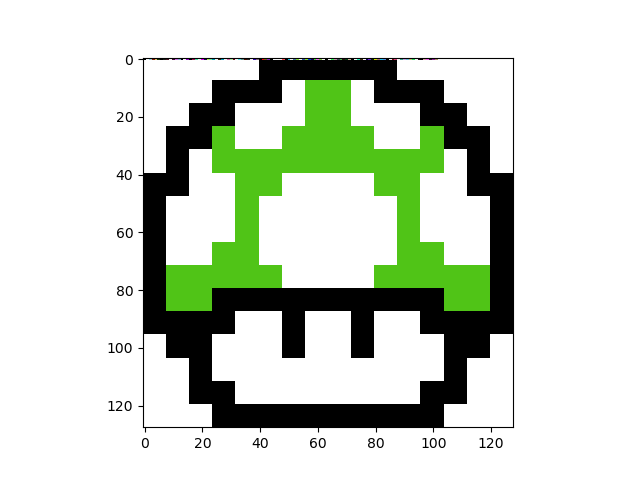

In [2]:
#%matplotlib notebook 
imagem = plt.imread("encrypt.bmp")
plt.imshow(imagem)
plt.show()

# de acordo com a deep web, o hacker conhecido como MIB assina seus hacks com um segredo.

# huuum. isso me parece **suspeito.**

## * imagem com pixels estranhos.
## * código secreto???
# e agora?


# **VERMELHO**  **252** **61**  **113** 

# **VERDE**  **2**  **178** **21**.

# **AZUL**  **6** **1**  **21** 

# MIB.

# RGB???
# MIB ???


# VALORES DE RGB?


# M =  **252** **61**  **113** 

# I =  **2**  **178** **21**.

# B =  **6** **1**  **21** 

# Tabela ASCII.

### M = 77 I = 73 B = 66

# ALFABETO ASCII MAIUSCULO: DE 65 A 90
### M = 77 - 65 , I = 73 - 65, B = 66 - 65
### M = 12 I = 8, B = 1

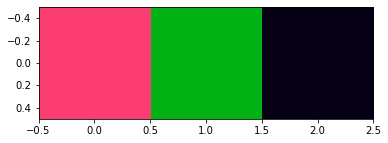

In [3]:
%matplotlib inline

A = np.array([[[252,61,113],[2,178,21],[6,1,21]],],dtype=np.int32)
    
plt.imshow(A)

In [4]:
A = np.array([[252,61,113],[2,178,21],[6,1,21]],dtype=np.float32)
B = np.array([12,8,1], dtype=np.float32)
chute = np.array([0.0,0.0,0.0],dtype=np.float32)


items = [widgets.Label(math('A',A)), widgets.Label(math('B',B)), widgets.Label(math('x(0)',chute)) ]
widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 300px)"))


GridBox(children=(Label(value='$$A= \\begin{bmatrix}\n  252. & 61. & 113.\\\\\n  2. & 178. & 21.\\\\\n  6. & 1…

# vamos tentar resolver as equações?

In [5]:
def jacobi(a,b,x,t=50, tol=1e-8):
    x = x.copy(); x0 = x.copy(); n=len(x); reslist = []
    m = 0; mathtx = mat_print(m,x); m += 1
    while m < t:
        q = np.zeros(x.shape)
        for i in range(n):
            s=0
            for j in range(n):
                if i!=j:
                    s += a[i,j] *x[j]
            q[i] = ((b[i]-s)/a[i,i])
        x = np.array(q)
        if all([(False if abs(x0[k] - x[k]) > tol else True) for k in range(len(x))]):                 
            break
        mathtx += mat_print(m,q); reslist.append(q)
        x0 = np.array(q)
        m += 1
    return mathtx, reslist

res_j,l_j = jacobi(A,B,chute, t=20); display(HTML(res_j))

In [6]:
def seidel(a,b,x,t=50, tol=1e-8):
    x = x.copy(); x0 = x.copy(); n=len(x); reslist = []
    m = 0; mathtx = mat_print(m,x) ; m += 1
    
    while m < t:
        for i in range(n):
            s=0
            for j in range(n):
                if i!=j:
                    s += a[i,j] *x[j]
            x[i] = (b[i]-s)/a[i,i]
            
        if all([(False if abs(x0[k] - x[k]) > tol else True) for k in range(len(x))]): break
        mathtx += mat_print(m,x); reslist.append(x.copy())
        
        x0 = x.copy()
        m += 1
    return mathtx, reslist

res_s, l_s = seidel(A,B,chute, t=200); display(HTML(res_s))

In [7]:
def gauss_elim(a,b):
    np.set_printoptions(suppress=True)
    res = []; n=len(b)
    c=np.concatenate([a,b],axis=1) 
    res.append(widgets.Label(math('A U B',c)))
    
    for e in range(n):
        t=c[e,e]
        for j in range(e,n+1):
            c[e,j]=c[e,j]/t 
        
        res.append(widgets.Label(math('A(nrm)',c)))
        for i in range(e+1,n):
            t=c[i,e]
            for j in range(e,n+1):
                c[i,j]=c[i,j]-t*c[e,j]
            
            res.append(widgets.Label(math('A(red)', c)))
    x=np.zeros([n,1]) 
    x[n-1]=c[n-1,n]
    
    for i in range(n-2,-1,-1):
        s=0
        for j in range(i+1,n):
            s=s+c[i,j]*x[j]
        x[i]=c[i,n]-s
    res.append(widgets.Label(math('A(fin)',x)))
    return x, res


A = np.array([[252,61,113],[2,178,21],[6,1,21]],dtype=np.float32)
B = np.array([[12],[8],[1]], dtype=np.float32)

_,a = gauss_elim(A,B)

widgets.GridBox(a, layout=widgets.Layout(grid_template_columns="repeat(1, 600px)"))


GridBox(children=(Label(value='$$A U B= \\begin{bmatrix}\n  252. & 61. & 113. & 12.\\\\\n  2. & 178. & 21. & 8…

In [8]:
widgets.GridBox([widgets.Label(res_j), widgets.Label(res_s)], \
                layout=widgets.Layout(grid_template_columns="repeat(2, 400px)"))

GridBox(children=(Label(value='$$ x^{(k=0)} = \\begin{bmatrix}\n  0. & 0. & 0.\\\\\n\\end{bmatrix} $$ $$ x^{(k…

# 0.02 0.04 0.04
# e daí?


# o que temos?
* os valores de RGB que formam a letra M,I e B.
* a equação geral utilizada para formarem os valores.

# agora finalmente podemos tentar decodificar a imagem

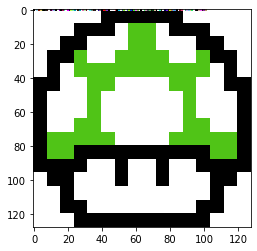

In [9]:
#%matplotlib notebook 
imagem = plt.imread("encrypt.bmp")
plt.imshow(imagem)
plt.show()

In [10]:
def decrypt(img, x1, x2, x3):
  """ DESCRIPTOGRAFAR A IMAGEM """
  text = ""
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      a = img[y,x]
      if np.all(np.equal(a,255)): text += ' '
      else: text += chr(int(round((a[0] * x1 + a[1]  * x2 + a[2] * x3) + 65)))

  return text

x1 = 0.02; x2 = 0.04; x3 = 0.04

print(decrypt(imagem,x1,x2,x3))

A VERDADE ESTA MAIS PERTO DO QUE VOCE IMAGINA   MAS NO MOMENTO A PRINCESA SE ENCONTRA EM OUTRO CASTELO                                                                  AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                                                                                AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA                

# FIM.

# dúvidas?

# continua.. (no próximo seminário. rs)
